### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- sklearn.linear_model for the multiple models tested
- sklearn.mixture for Gaussian Mixture Model
- data_spliter for splitting the data into training and testing sets
- matplotlib.pyplot for plotting the data

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [20]:
x = np.load("Xtrain_Classification1.npy")
y = np.load("ytrain_Classification1.npy")

x =(x).astype('float32')/255.0
x = x.reshape(-1, 28,28,3)

print(x.shape)
print(y.shape)

x, X_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(x.shape, X_test.shape, y.shape, y_test.shape)

(6254, 28, 28, 3)
(6254,)
(5003, 28, 28, 3) (1251, 28, 28, 3) (5003,) (1251,)


In [21]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

augmented_data = []
augmented_labels = []

for i in range(x.shape[0]):
    img = x[i]
    label = y[i]
    if label == 0:
        continue
    img = img.reshape((1,) + img.shape)  # Reshape the image for flow method
    label = np.array([label])  # Convert label to numpy array
    for batch in datagen.flow(img, label, batch_size=1):
        augmented_data.append(batch[0][0])  # Extract augmented image
        augmented_labels.append(batch[1][0])  # Extract augmented label
        break  # Exit the loop after one iteration to avoid infinite loop
    
    
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest')

augmented_data2 = []
augmented_labels2 = []

for i in range(x.shape[0]):
    img = x[i]
    label = y[i]
    if label == 0:
        continue
    img = img.reshape((1,) + img.shape)  # Reshape the image for flow method
    label = np.array([label])  # Convert label to numpy array
    for batch in datagen.flow(img, label, batch_size=1):
        augmented_data2.append(batch[0][0])  # Extract augmented image
        augmented_labels2.append(batch[1][0])  # Extract augmented label
        break  # Exit the loop after one iteration to avoid infinite loop

In [22]:
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)
augmented_data2 = np.array(augmented_data2)
augmented_labels2 = np.array(augmented_labels2)

print(augmented_data.shape)
print(augmented_data2.shape)

(723, 28, 28, 3)
(723, 28, 28, 3)


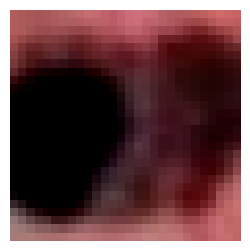

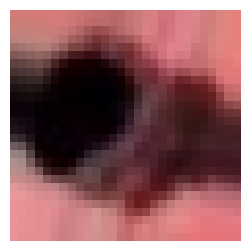

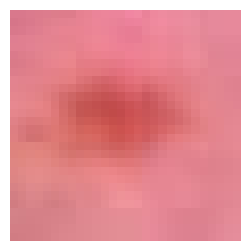

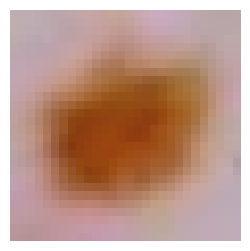

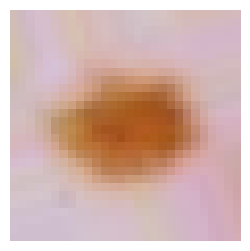

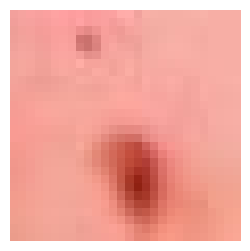

In [23]:
for i in range(2):
    color_image = np.stack([augmented_data[i][:,:,0], augmented_data[i][:,:,1], augmented_data[i][:,:,2]], axis=-1)
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()
    color_image = np.stack([augmented_data2[i][:,:,0], augmented_data2[i][:,:,1], augmented_data2[i][:,:,2]], axis=-1)
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()
    color_image = np.stack([x[i][:,:,0], x[i][:,:,1], x[i][:,:,2]], axis=-1)
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()
 

In [24]:
x = np.concatenate((x, augmented_data), axis=0)
y = np.concatenate((y, augmented_labels), axis=0)
final_x = np.concatenate((x, augmented_data2), axis=0)
final_y = np.concatenate((y, augmented_labels2), axis=0)

unique, counts = np.unique(final_y, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

final_y = tf.keras.utils.to_categorical(final_y,2)
y_test = tf.keras.utils.to_categorical(y_test,2)

print(final_x.shape)
print(final_y.shape)
print(X_test.shape)
print(y_test.shape)

np.save('x_train.npy', final_x)
np.save('y_train.npy', final_y)
#np.save('x_test.npy', X_test)
#np.save('y_test.npy', y_test)


{0.0: 4280, 1.0: 2169}
{0.0: 1078, 1.0: 173}
(6449, 28, 28, 3)
(6449, 2)
(1251, 28, 28, 3)
(1251, 2)
